# 요약

Adult dataset을 기반으로 하여, Decision tree, MLP, logistic Regression, Random forest 4 가지 classification 모델을 만든다. 이 모델들을 이용하여, Adult data가 가진 여러개의 feature을 기반으로, 한 instance가 50만 달러보다 큰 수입을 받고 있는지, 50만 달러보다 적은 수입을 받고 있는지 예측할 수 있다.

# Data URL:

https://raw.githubusercontent.com/MS0117/ML/main/adult.csv

# 실험설계
adult data set의 instance들을 일단 train set과 test set으로 나눈다. 그 후 각각의 분류 알고리즘들에 대하여, train set으로 모델을 생성한다. 이때, sklearn에서 기본적으로 제공하는 디폴트 모델 외에, 여러개의 파라미터를 수정하여 여러 개의 모델을 생성하고, 이것들 각각에 cross validation을 적용하여, 가장 좋은 성능을 가진 모델을 만든다. 추가로, 각각의 분류 알고리즘들마다 feature selection을 통해 가장 좋은 성능을 가진 feature들만을 골라서 만든 모델을 만들고, 그것들의 성능도 평가를 한다. 이때, Selecting K best features 방법을 사용했다.  `SelectKBest`는 사용자가 지정한 k개의 중요한 특성을 반환해주는데, 이 데이터셋에서는 음의 값이 없기 때문에 사용이 가능했다. 이들 중에서, 즉, 디폴트 모델, 파라미터를 변경한 모델, feature selection을 통한 모델 중에서 가장 좋은 성능을 보여준 모델과 그것의 성능을 알아보고, 왜 그 모델의 성능이 가장 좋은지, 그 원인을 유추해 보도록 하기로 한다.

# 라이브러리 Import

In [ ]:
import pandas as pd
from IPython.display import Image
import pydotplus


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier  #from sklearn.externals.six import StringIO
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz  
from six import StringIO
from IPython.display import Image  
import pydotplus
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# 데이터셋 설명

이번 실험에서는 adult set을 이용하였다. 캐글에서 csv 파일을 다운받은 후, 깃허브에 업로드하여, 깃허브의 raw url을 가져오는 것으로 데이터셋을 불러왔다.

이번 프로젝트에서 adult 데이터셋을 선택한 이유는 이 데이터셋이 분류하기에 적절한 데이터 같다고 생각했기 때문이다. 이번 과제는 분류 작업이 주를 이루는데, 수입 label로 두고 분류하면 좋을 것 같았다. 그리고, feature수와 instance들의 수도 적당하다고 생각했다. 더군다나, 현대 사회에서 어떤 요소들이 개인의 수입에 영향을 미치는지 주제 자체가 꽤 흥미로웠다.instance는 총 48842개이고, feature은 15개이다.

이 데이터셋은 한 사람의 age, 고용 형태, 교육 상태 등을 feature로 가지고, 최종적으로 그 사람의 수입이 얼마나 되는지 나타내는 데이터셋이다.
각 feature이 나타내는 내용은 다음과 같다.

1.age: 개인의 나이를 나타내는 feature이다.

2.workclass: 개인의 고용형태을 나타내는 feature이다.Self-emp-inc, Federal-gov, Local-gov 등의 값을 도메인으로 가진다.

3.fnlwgt: 인구조사국이 부여한 개인의 가중치를 나타내는 feature이다.

4.education: 개인의 최종 학력을 나타내는 지표이다. 

5.educational_num: 최종학력, 즉 교육 수준을 숫자로 범주화하여 나타낸 지표이다.

6.marital_status: 개인의 결혼 여부를 나타내는 지표이다.Married-civ-spouse, Divorced, Never-married, Separated, Widowed 등등의 값을 가진다.

7.occupation: 개인의 직업을 나타내는 지표이다.

8.relationship: 개인이 한 가정에서 어떤 역할을 나타내고 있는지 보여주는 지표이다. Wife, Own-child, Husband 등을 도메인으로 가진다.

9.race : 인종을 나타낸다. White, Asian-Pac-Islander 등의 값을 도메인으로 가진다.

10.gender : 성별을 나타낸다. Male, Female을 도메인으로 가진다.

11.capital_gain: 개인의 자본 이익을 나타낸다. (단위는 달러)

12.capital_loss:개인의 자본 손실을 나타낸다. (단위는 달러)

13.hours_per_week : 주당 근무 시간을 나타내는 지표이다.

14.native_country : 개인의 출신 국가를 나타낸다.

15.income: 최종 수입을 나타내는 지표이다. 여기서는 50만달러보다 많은지(>50K), 혹은 적은지(<=50K), 두 개의 값만이 나타난다. 

In [ ]:
data_url = "https://raw.githubusercontent.com/MS0117/ML/main/adult.csv"

In [ ]:
data = pd.read_csv(data_url)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.shape

(48842, 15)

In [ ]:
print("instance의 수:", len(data))

instance의 수: 48842


In [ ]:
print("feature의 수", len(data.columns))

feature의 수 15


In [ ]:
data.isnull().any() #null값을 가진 instance 없음

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [ ]:
df = data.dropna()  #null값 없음을 확인할 수 있다.
df.shape

(48842, 15)

위 코드를 통해서 데이터셋에 null값이 없는 것을 알 수 있다. 따라서, 이제 범주형 feature들을 연산 가능한 수치값으로 바꿔주는 전처리 과정을 할 수 있다.

In [ ]:
encoding_columns = ['workclass','education','marital-status', 'occupation',   'relationship','race','gender','native-country', 'income']
not_encoding_columns = ['age','fnlwgt', 'educational-num','capital-gain',   'capital-loss','hours-per-week']


In [ ]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series) 인코딩하기
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label
data1 = df[encoding_columns].apply(encoding_label)
data1.head()
data2 = data[not_encoding_columns]
data2.head()
data=data1.join(data2)

In [ ]:
data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,4,1,4,7,3,2,1,39,0,25,226802,7,0,0,40
1,4,11,2,5,0,4,1,39,0,38,89814,9,0,0,50
2,2,7,2,11,0,4,1,39,1,28,336951,12,0,0,40
3,4,15,2,7,0,2,1,39,1,44,160323,10,7688,0,40
4,0,15,4,0,3,4,0,39,0,18,103497,10,0,0,30


위 코드를 통해서 범주형 feature들을 integer로 바꿔주는 전처리 해주는 작업을 하였다. label feature인 income을 보면 50만 달러보다 작은 것은 0으로, 50만 달러보다 수입은 많다는 것은 1로 나타난 것을 알 수 있다.

In [ ]:
x = data.drop(columns='income')     #label과 feature 분리
y = data['income'] 


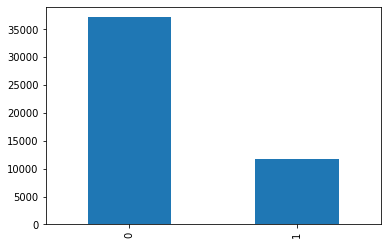

In [ ]:
y.value_counts().plot.bar()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3,random_state=42) #tran test 데이터셋 분리

위 코드를 통해서, data set에서 feature과 label column을 나눠주고, train set과 test set으로 나누어주는 작업을 했다. 0인 label이 더 많은 편향된 데이터이다. 따라서 분석을 할 때, accuracy만 고려하면 안 되고, recall, fscore, auc 등 다양한 지표를 고려해야한다.

# 1. ZeroR
선정이유:ZeroR은 모든 classifier의 base 성능이 되기 때문에 필요하다고 생각했다.

처음은 ZeroR 분류를 해보았다. ZeroR은 모든 data instance를 0으로 예측하거나, 즉 수입이 50만 달러보다 작은 것으로 예측하거나, 모든 instance들을 1로 예측하거나 둘 중하나다. 여기서 모든 데이터를 0으로 예측하면, 76%의 정답률을 보이는 것으로 나타났다. 따라서, 우리가 만드는 모델은 적어도 76%보다는 높아야 좋은 성능을 내는 것으로 볼 수 있다.

In [ ]:
y.value_counts()/y.shape[0]*100

0    76.071823
1    23.928177
Name: income, dtype: float64

# 2.Decision Tree
선정이유:이번 실험에서 사용한 데이터셋은 정형데이터셋이라, 14개의 Feature를 이용해서 decision tree를 만들면, 좋은 성능을 보여줄 것이라 기대하고 Decision Tree를 만들었다. 

먼저 sklearn에서 제공하는 default decision tree를 만들고, leaf 노드를 17개로 제한하는 모델, max_dept 8개 까지 만드는 모델, min_sample을 5로 하는 모델을 만들고, cross validation을 해보았다. 

그 결과, max_depth를 8개까지 제한한 3번 모델이 가장 성능이 좋음을 알 수 있었다. 그 이유는 depth를 줄여서 over fitting을 방지하고 더 일반화된 모델을 만들 수 있기 때문이라고 추측된다. max_depth parameter을 설정하지 않으면, pruning을 하지 못하고, instance가 나올때까지 트리를 계속 만들기 때문에, 과적합이 될 수 있을 것이다.

In [ ]:
DT1 = DecisionTreeClassifier(random_state=42)
print('cv_score1 : ', cross_val_score(DT1,x_train,y_train,cv=5).mean())
DT2=DecisionTreeClassifier(random_state=42,max_leaf_nodes=17)  
print('cv_score2 : ', cross_val_score(DT2,x_train,y_train,cv=5).mean())
DT3=DecisionTreeClassifier(random_state=42,max_depth=8)
print('cv_score3 : ', cross_val_score(DT3,x_train,y_train,cv=5).mean())
DT4=DecisionTreeClassifier(random_state=42,min_samples_split=5)
print('cv_score4 : ', cross_val_score(DT4,x_train,y_train,cv=5).mean())

cv_score1 :  0.80941222601947
cv_score2 :  0.8507414857213064
cv_score3 :  0.8529352122586431
cv_score4 :  0.8139166509772988


**pruning**

그 후 max depth를 중심으로, parameter를 조금 더 많이 바꿔보아서 테스트해보았다. 

그 결과, 다음과 같은 결과를 얻었다. 트리의 depth는 10개를 전후로 가장 좋은 성능을 보이고, 그 후에는 오히려 depth를 증가해도 성능은 내려갔다.  
feature수는 14개로 한정적이므로, depth를 크게 증가시키면 오히려 과적합이 발생하는 것이고, 어느 순간의 depth를 넘어가면, 더 이상 가지치기를 할 수 없어서, 성능이 비슷해지는 것을 알 수 있었다.

여기서 x_train에 iloc을 안 붙여서 신택스 에러가 조금 났었다.
iloc은 행 혹은 열을 숫자로 location을 나타내서 Selecting or indexing 하는 방법이라고 한다. 이를 붙여야 인덱스를 사용하여, train set을 불러올 수 있었다.

[0.75819708 0.8370529  0.84948374 0.85232096 0.85214541 0.84927897
 0.84647094 0.84117698 0.83363066 0.82710817 0.82090722 0.81482342
 0.81274658 0.8122786  0.8096462  0.80932452 0.80952923 0.80911977
 0.80982169 0.80909051]


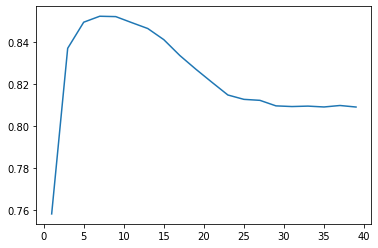

In [ ]:
leaf_lst = np.arange(1, 40, 2)      # leaf list
dtprune_score = np.array([])

for i in leaf_lst:
  skf = StratifiedKFold(n_splits=5)
  val_accuracy = np.array([])
  for train_index, val_index in skf.split(x_train, y_train):    
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]     
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    prune_classifier_val = DecisionTreeClassifier(max_depth=i, random_state=42)
    prune_classifier_val.fit(x_train_cv, y_train_cv)
    val_accuracy = np.append(val_accuracy, prune_classifier_val.score(x_val_cv, y_val_cv))    
  dtprune_score = np.append(dtprune_score, val_accuracy.mean())   
print(dtprune_score)
plt.plot(leaf_lst, dtprune_score)

**Feature Selection 적용**

그 후 feature selection을 적용하여 새로운 모델을 만들어 보았다. 기본 모델과 최적의 성능을 보여준, max_depth가 8인 3번 모델에 feature selection을 적용해보았다. 

그 결과는 오히려 feature selection을 하면, score가 떨어지는 것으로 나타났다.  feature selectiond을 하지 않은 3번모델, 즉, 원래 feature로 tree의 depth만 줄여준 모델이 가장 좋은 성능을 보여주는 것으로 나타난 것이다. 
그 이유는 decision tree는 feature를 기준으로 가지를 치는데, feature 자체가 줄어들어 제대로 fit을 하지 못하는 것이라고 생각된다.


In [ ]:

selector=SelectKBest(chi2, k=5)
x_train_selected = selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)

print('select_cv_score1 : ', cross_val_score(DT1,x_train_selected,y_train,cv=5).mean())
print('select_cv_score2 : ', cross_val_score(DT3,x_train_selected,y_train,cv=5).mean())


select_cv_score1 :  0.7564421613330732
select_cv_score2 :  0.8207903437171493


**결론:가장 성능이 좋은 3번 모델 테스트 결과**

accuracy는 0.8637821606496963로 나타났다. auc는 0.7566918925700852로 나타났다.  
모든 instance들을 0으로만 예측을 하는 ZeroR 모델보다  10%가 높은 수치이다.


0.8637821606496963
[[10756   477]
 [ 1519  1901]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


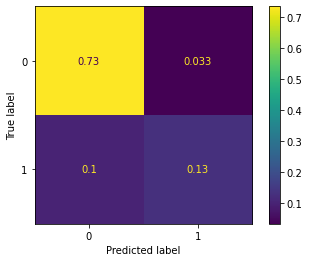

In [ ]:
DT3.fit(x_train,y_train)
print(DT3.score(x_test, y_test))
y_pred_dt = DT3.predict(x_test)
y_prob_dt = DT3.predict_proba(x_test)[:, 1]

from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))
plot_confusion_matrix(DT3, x_test, y_test, normalize='all')

In [ ]:
DT_accuracy = accuracy_score(y_test, y_pred_dt)
DT_precision = precision_score(y_test, y_pred_dt)
DT_recall = recall_score(y_test, y_pred_dt)
DT_f1 = f1_score(y_test, y_pred_dt)
print(DT_accuracy)
print(DT_precision)
print(DT_recall)
print(DT_f1)
DT_auc = roc_auc_score(y_test, y_pred_dt)
print(DT_auc)

0.8637821606496963
0.7994112699747687
0.5558479532163743
0.6557433597792341
0.7566918925700852


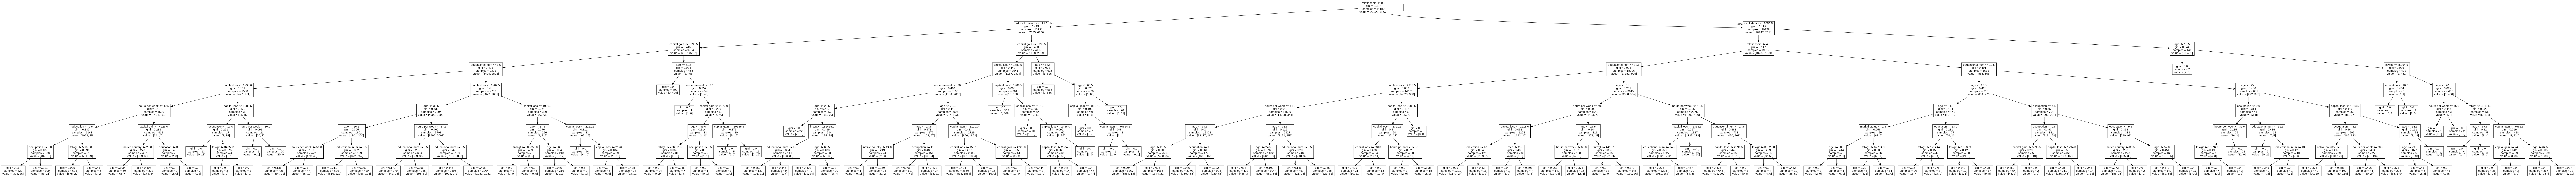

In [ ]:
dot_data = StringIO()
export_graphviz(DT3, feature_names=x.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

# 3.MLP
선정이유:역시 Decision Tree와 더불어 대표적인 분류 모델이다. 시간이 오래 걸리지만, 그만큼, weight값을 조정해주기 때문에 좋은 성능을 기대했다. 

먼저 sklearn에서 제공하는, default MLP를 만들고, hidden layer 개수를 30개로 제한한 모델, learning rate를 0.001에서 0.0001로 줄인 모델, iteration을 10000으로 증가시킨 모델을 만들어보았다. 

그 결과 hidden layer 사이즈를 줄인 모델이 가장 성능이 좋게 나왔다. hidden layer를 늘리면, training data에 더 fit하게 모델이 형성되지만,, 그 만큼 과적합이 심해지기 때문에, hidden layer을 줄이는 것이 더 좋은 모델이 완성되는 것으로 유추할 수 있다.

In [ ]:

MLP1=MLPClassifier(random_state=42)
print('cv_score1 : ', cross_val_score(MLP1,x_train,y_train,cv=5).mean())
MLP2=MLPClassifier(random_state=42,hidden_layer_sizes=(30,))  
print('cv_score2 : ', cross_val_score(MLP2,x_train,y_train,cv=5).mean())
MLP3=MLPClassifier(random_state=42,learning_rate_init=0.001)  
print('cv_score3 : ', cross_val_score(MLP3,x_train,y_train,cv=5).mean())
MLP4=MLPClassifier(random_state=42,max_iter=10000)
print('cv_score4 : ', cross_val_score(MLP4,x_train,y_train,cv=5).mean())

cv_score1 :  0.5770179574920163
cv_score2 :  0.7448900980646445
cv_score3 :  0.5770179574920163
cv_score4 :  0.5770179574920163


**hidden layer**

위 실험결과로 hidden layer size가 성능에 중요하다는 것을 알게 되었다.  
따라서 hidden layer size를 반복문을 통해 여러번 테스트를 해보았다.   
hidden layer size가 (3,5)일때 가장 좋은 성능을 보이는 것으로 나타났다.   
즉, 첫번째 hidden layer에는 3개의 노드, 두번째 hidden layer에선 5개의 노드를 만드는 것이 가장 좋은 성능을 보였다. hidden layer의 노드가 가 많아지면, overfit이 일어남과 동시에 학습이 복잡해지고, 반대로, hidden layer가 너무 적으면, 학습 자체가 잘 되지 않는다.  

[0.7581970818161062, 0.7581970818161062, 0.7581970818161062, 0.7581970818161062, 0.7610051257068077, 0.7684928620114655, 0.794378303831119, 0.7813624899323883, 0.7624967771022758, 0.7666502222414445, 0.7581385851796629, 0.6975827807189371]


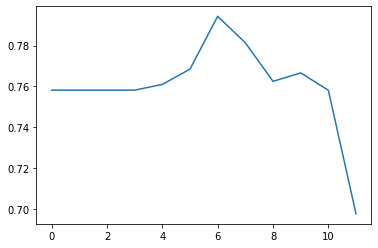

In [ ]:
hidden_lst = [[2, 2], [2, 3], [2, 5], [2, 7], [3, 2], [3, 3], [3, 5], [3, 7], [5, 2], [5, 3], [5, 5], [5, 7]]
hidden_index = np.arange(len(hidden_lst))
score = []

for i in hidden_lst:
  skf = StratifiedKFold(n_splits=5)
  val_accuracy = np.array([])
  for train_index, val_index in skf.split(x_train, y_train):    
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]     
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    mlp_val = MLPClassifier(random_state=42, hidden_layer_sizes=(i[0], i[1]), max_iter=1000)
    mlp_val.fit(x_train_cv, y_train_cv)
    val_accuracy = np.append(val_accuracy, mlp_val.score(x_val_cv, y_val_cv))    
  score.append(val_accuracy.mean())   
print(score)
plt.plot(hidden_index, score)

**Feature selection 적용**
Decision Tree의 경우와 마찬가지로 기본적인 모델과 가장 성능이 좋은 hidden layer (3,5)를 가진 MLP에 feature selection을 해주었다. 그 결과,기본 모델에 feature selection을 해준것은 성능이 증가하였고, 기존에 가장 좋았던, hidden layer을 줄인 모델은 성능이 약간 떨어졌음이 관찰되었다.

이는 hidden layer가 많은 디폴트 모델에서 feature selection을 해서, feature 개수를 줄임으로서, overfit된 것을 줄여준 것에 기인한 것으로 유추할 수 있다.

반대로, hidden layer 조정했던 모델에선, 학습하는데 필요한 feature가 몇 개 빠졌기 때문에, 모든 feature가지고 학습했을 때보다 학습이 덜 되었다는 것을 알 수 있다. 즉, 모든 feature들을 사용했던 것 보다 underfit된 것이다.

In [ ]:
selector=SelectKBest(chi2, k=5)
x_train_selected = selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)
MLP_new = MLPClassifier(random_state=42, hidden_layer_sizes=(3,5), max_iter=1000)
print('select_cv_score1 : ', cross_val_score(MLP1,x_train_selected,y_train,cv=5).mean())
print('select_cv_score2 : ', cross_val_score(MLP_new,x_train_selected,y_train,cv=5).mean())


select_cv_score1 :  0.6740345648642097
select_cv_score2 :  0.7582555784525497


**결론:가장 성능이 좋은 hidden layer size (3,5) 모델의 테스트 결과**

accuracy는 0.8061830341909506로 나타나고, auc는 0.5983197091068869이다.


0.8061830341909506
[[11100   133]
 [ 2707   713]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


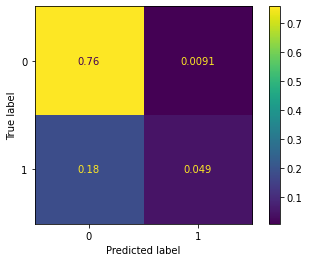

In [ ]:
MLP_new.fit(x_train,y_train)
print(MLP_new.score(x_test, y_test))
y_pred_dt = MLP_new.predict(x_test)
y_prob_dt = MLP_new.predict_proba(x_test)[:, 1]

from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))
plot_confusion_matrix(MLP_new, x_test, y_test, normalize='all')

In [ ]:
MLP_accuracy = accuracy_score(y_test, y_pred_dt)
MLP_precision = precision_score(y_test, y_pred_dt)
MLP_recall = recall_score(y_test, y_pred_dt)
MLP_f1 = f1_score(y_test, y_pred_dt)
print(MLP_accuracy)
print(MLP_precision)
print(MLP_recall)
print(MLP_f1)
MLP_auc = roc_auc_score(y_test, y_pred_dt)
print(MLP_auc)

0.8061830341909506
0.8427895981087471
0.20847953216374268
0.3342709798406001
0.5983197091068869


# 4.Logistic Regression
선정이유:다른 모델과 다르게, instance들이 특정 label을 가질 확률을 이용하는 모델이다.threshold에 따라서 그 instance를 label로 최종 분류한다. 따라서, 다른 모델과 다른 성능을 보일까하는 기대감이 있었다.

마찬가지로 Sklearn에서 제공하는 default의 logistic regression을 만들고, 파라미터를 조정한 모델들을 만들어보았다. 여기서는 max_iter값을 조정하면서 parameter을 변경했다. 

그 후 cross validation을 통해 각 모델의 성능을 분석한 결과, max_iter 즉 train 반복을 더 많이한 모델에서 약간의 성능 향상이 있음을 알 수 있었다. 즉, 훈련 반복을 많이 할수록, Loss가 줄어들기 때문에, 성능이 약간 향상됨을 알 수 있다.

In [ ]:
LR1=LogisticRegression(random_state=42)
print('cv_score1 : ', cross_val_score(LR1,x_train,y_train,cv=5).mean())
LR2=LogisticRegression(random_state=42,max_iter=1000)  
print('cv_score2 : ', cross_val_score(LR2,x_train,y_train,cv=5).mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cv_score1 :  0.7863639523482994
cv_score2 :  0.7884990795784836


**Threshold 변화**    

sklearn에서 제공하는 기본 threshold는 0.5이기 때문에,  
threshold를 0.3, 0.4 ...0.9로 변화시키면서, logistic regression의 스코어를 평가해 보았다.  
실험 결과, threshold가 0.7일때 가장 좋은 성능을 보임을 알 수 있었다. 

In [ ]:
def cal_metrics(labels, predicts):
  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0
  for i in range(len(predicts)):
    if labels[i] == 1 and predicts[i] == 1:
      true_positive += 1
    if labels[i] == 0 and predicts[i] == 0:
      true_negative += 1
    if labels[i] == 0 and predicts[i] == 1:
      false_positive += 1
    if labels[i] == 1 and predicts[i] == 0:
      false_negative += 1

  return true_positive, true_negative, false_positive, false_negative

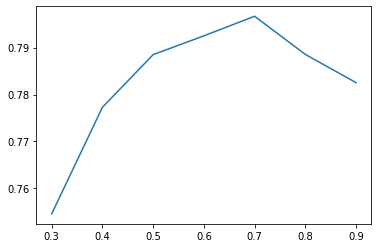

In [ ]:
threshold_lst = np.arange(0.3, 0.9, 0.1)
threshold_score = np.array([])

logistic_threshold = LogisticRegression(max_iter=10000, random_state=42)

for i in threshold_lst:
  skf = StratifiedKFold(n_splits=5)
  val_accuracy = np.array([])
  for train_index, val_index in skf.split(x_train, y_train):    # train data를 validation set으로 나눠
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]     
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    logistic_threshold.fit(x_train_cv, y_train_cv)      # validation set의 train set으로  학습
    predict_proba = logistic_threshold.predict_proba(x_val_cv)   # 확률 예측
    predict_proba = predict_proba[:,1]
    predict_y = np.where(predict_proba >= i, 1, 0)      # threshold를 기준으로 1, 0 분류

    TP, TN, FP, FN = cal_metrics(y_val_cv.iloc, predict_y) 
    val_accuracy = np.append(val_accuracy, (TP + TN) / len(predict_y))    # accuracy
  threshold_score = np.append(threshold_score, val_accuracy.mean())

plt.plot(threshold_lst, threshold_score)

In [ ]:
logistic_threshold = LogisticRegression(max_iter=10000, random_state=42)

logistic_threshold.fit(x_train, y_train)
predict_y_proba = logistic_threshold.predict_proba(x_test)
predict_y_proba = predict_y_proba[:,1]

predict_y = np.where(predict_y_proba >= 0.7, 1, 0)

TP, TN, FP, FN = cal_metrics(y_test.iloc, predict_y) 

print(classification_report(y_test, predict_y))               # threshold 0.3



              precision    recall  f1-score   support

           0       0.80      0.99      0.89     11233
           1       0.85      0.20      0.32      3420

    accuracy                           0.80     14653
   macro avg       0.83      0.59      0.60     14653
weighted avg       0.81      0.80      0.75     14653



**Feature selection 적용**

앞선 실험과 마찬가지로, 기본적인 모델과 2번 Logistic Regression에 feature selection을 해주었다. 두 모델 모두 약간의 성능 향상이 있음을 알 수 있는데, Logistic Regression 역시, 중요한 Feature들 만으로 분류를 함으로써, overfit을 피하고 더 일반화된 모델을 만들었음을 알 수 있다.

In [ ]:
selector=SelectKBest(chi2, k=5)
x_train_selected = selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)

print('select_cv_score1 : ', cross_val_score(LR1,x_train_selected,y_train,cv=5).mean())
print('select_cv_score2 : ', cross_val_score(LR2,x_train_selected,y_train,cv=5).mean())


select_cv_score1 :  0.7948170029367673
select_cv_score2 :  0.7948170029367673


**결론:**

가장 좋은 성능을 보인 2번째 Logistic Regression 모델, 즉 Loss가 가장 적고 converge가 잘 된 모델에 feature selection을 적용한 모델에서의 accuracy는 0.8045451443390432로 나타났다. auc는 0.6176905400389308로 측정되었다.

0.8045451443390432
[[10875   358]
 [ 2506   914]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


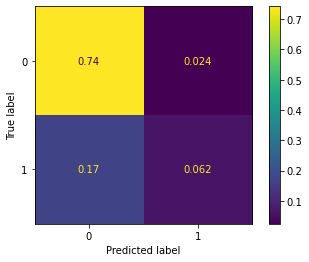

In [ ]:
LR2.fit(x_train_selected,y_train)
print(LR2.score(x_test_selected, y_test))
y_pred_dt = LR2.predict(x_test_selected)
y_prob_dt = LR2.predict_proba(x_test_selected)[:, 1]

from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))
plot_confusion_matrix(LR2, x_test_selected, y_test, normalize='all')

In [ ]:
LR_accuracy = accuracy_score(y_test, y_pred_dt)
LR_precision = precision_score(y_test, y_pred_dt)
LR_recall = recall_score(y_test, y_pred_dt)
LR_f1 = f1_score(y_test, y_pred_dt)
print(LR_accuracy)
print(LR_precision)
print(LR_recall)
print(LR_f1)
LR_auc = roc_auc_score(y_test, y_pred_dt)
print(LR_auc)

0.8045451443390432
0.7185534591194969
0.2672514619883041
0.3895993179880648
0.6176905400389308


# 5.Random Forest
선정이유:가장 기대하는 모델이었다. 왜냐하면, 정형데이터에서 가장 좋은 성능을 보여주는 모델이기도 하기 때문이다. 적어도, decision tree보다 좋은 성능을 보일 것이라 기대했다.

마찬가지로 Sklearn에서 제공하는 default의 Random Forest 모델을 만들고, 파라미터를 조정한 모델들을 만들어보았다. 여기서는 max_iter값을 조정하면서 parameter을 변경했다. 디폴트 모델은 n_estimator이 100이지만, 두번째, 세번째 모델은 n_estimator을 각각 200, 300으로 늘려주었다. 

그 후 cross validation을 통해 각 모델의 성능을 분석한 결과, n_estimators를 늘려줄수록, 즉 생성되는 tree를 늘려줄수록, 성능이 약간씩 증가한 것을 알 수 있었다.

In [ ]:
RF1=RandomForestClassifier(random_state=42)
print('cv_score1 : ', cross_val_score(RF1,x_train,y_train,cv=5).mean())
RF2=RandomForestClassifier(random_state=42,n_estimators=200)  
print('cv_score2 : ', cross_val_score(RF2,x_train,y_train,cv=5).mean())
RF3=RandomForestClassifier(random_state=42,n_estimators=300) 
print('cv_score3 : ', cross_val_score(RF3,x_train,y_train,cv=5).mean())


cv_score1 :  0.8523794771006459
cv_score2 :  0.8532277424982684
cv_score3 :  0.8541637143490401


**Pruning**

Random Forest는 decision tree를 여러개 합친 모델이기 때문에, 이 decision tree를 pruning해서 합치면 어떨까 하는 호기심이 생겼다. 따라서 min_sample_leaf 수를 조정하면서 실험을 해보았다.그 결과, min_sample_leaf가 60일때 가장 좋은 성능을 보였지만, 그래도 n_estimator을 증가시킨 모델보다는 정확도가 높지는 않았다.

[0.85211617 0.85237948 0.85196993 0.8523209  0.85065387 0.85030272
 0.85027347 0.84799204 0.8476996  0.84927907]


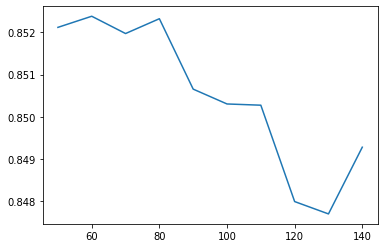

In [ ]:
leaf_lst = np.arange(50, 150, 10)
leaf_score = np.array([])

for i in leaf_lst:
  forest_leaf = RandomForestClassifier(random_state=42, n_estimators=10, min_samples_leaf=i)

  leaf_score = np.append(leaf_score, cross_val_score(forest_leaf, x_train, y_train, cv=5).mean())
print(leaf_score)
plt.plot(leaf_lst, leaf_score)

**Feature selection 적용**

Random Forest의 경우, n_estimator를 늘릴 수록, 즉 생성되는 tree 개수를 늘릴수록, 성능이 좋아진다는 것을 알았기 때문에, 가장 좋은 성능인 3번째 모델에 feature selection을 적용해서 얼마나 성능이 향상되는지 파악해보았다. 그러나 이 경우 feature selection을 하니 오히려 성능이 떨어진 것을 알 수 있었다. 
Random Forest도 결국 Decision Tree를 여러개 종합한 결과이기 때문에 feature이 적어질수록 분류를 세밀하게 하지 못할 것이다. 따라서 오히려 Feature selection을 하면 정확도가 떨어짐을 알 수 있다. 

In [ ]:
selector=SelectKBest(chi2, k=5)
x_train_selected = selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)

print('select_cv_score2 : ', cross_val_score(RF3,x_train_selected,y_train,cv=5).mean())


select_cv_score2 :  0.7789932905975063


**결론:**

가장 좋은 성능을 보인 3번째 random forest, 즉 Tree개수만 가장 많은 Random Forest의 정확도는 0.8654200505016038으로 나타났다. 
auc는 0.7883679978009654로 기록되었다.

0.8654200505016038
[[10479   754]
 [ 1218  2202]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


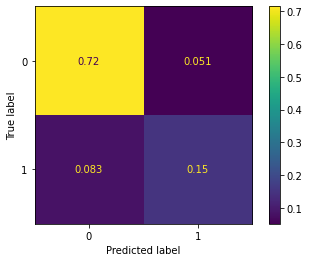

In [ ]:
RF3.fit(x_train,y_train)
print(RF3.score(x_test, y_test))
y_pred_dt = RF3.predict(x_test)
y_prob_dt = RF3.predict_proba(x_test)[:, 1]

from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))
plot_confusion_matrix(RF3, x_test, y_test, normalize='all')

In [ ]:
RF_accuracy = accuracy_score(y_test, y_pred_dt)
RF_precision = precision_score(y_test, y_pred_dt)
RF_recall = recall_score(y_test, y_pred_dt)
RF_f1 = f1_score(y_test, y_pred_dt)
print(RF_accuracy)
print(RF_precision)
print(RF_recall)
print(RF_f1)
RF_auc = roc_auc_score(y_test, y_pred_dt)
print(RF_auc)

0.8654200505016038
0.7449255751014885
0.643859649122807
0.6907151819322459
0.7883679978009654


# 6.KNN
선정이유:다른 모델과 달리, 규칙이나 weight값을 training하는 것이 아니라, 기존에 기억한 instance를 기반으로 새로운 intance를 분류하는 모델이기 때문에 이 모델을 시험해보았다.

KNN classifier도 역시 Sklearn에서 제공하는 라이브러리를 이용하여, 디폴트 파라미터를 이용한 모델을 먼저 생성하고, 이웃의 선택 수인 k를 바꿔가면서 새로운 파라미터를 가진 여러 모델을 만들어 보았다. 

그 결과, 큰 차이는 나지 않지만, 디폴트 k인 5일때보다, k가 10일때 가장 높은 성능을 보였다. 여기서 한 가지 생긴 의문은 k는 홀수로 하는 것이 짝수일 때보다 성능이 더 좋을텐데, 왜 8과 10으로 한 것이 성능이 가장 좋게 나왔는지 이다. 아마, k를 늘릴수록, 동점일 확률이 거의 없기 때문에 그런 것으로 유추할 수 있다. 예를 들어 가장 가까운 k개의 이웃을 뽑는 다고 할때, 이 k가 100이라는 큰 수라고 하자. 이때, 이 100개 중 50개가 라벨 0, 50개가 라벨 1일 확률은 매우 적을 것이다. 따라서 k가 증가하면 많은 이웃을 고려하니, 성능이 좋게 나오는 것일 수 있다.

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(x_train, y_train)

print('cv_score1 : ', cross_val_score(knn1,x_train,y_train,cv=5).mean())

n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
score = []

# 가장 적합한 k를 찾아봅니다.
for k in n_neighbors_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  score.append(cross_val_score(knn,x_train, y_train,cv=5).mean())

print(score)  

cv_score1 :  0.7722952075494798
[0.726929752658134, 0.7802216985730868, 0.7549504158227883, 0.7861885052184313, 0.7722952075494798, 0.7887624770044349, 0.7801631420453965, 0.7922431124317417, 0.7880311834899681, 0.7945830335027785]


**Feature selection 적용**

디폴트 모델과 k가 10인 값에 feature selection을 한 결과, 성능이 약간 줄었지만, 큰 차이는 나지 않는다.

In [ ]:
selector=SelectKBest(chi2, k=5)
x_train_selected = selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)
knn2 = KNeighborsClassifier(n_neighbors=10)
print('select_cv_score1 : ', cross_val_score(knn1,x_train_selected,y_train,cv=5).mean())
print('select_cv_score2 : ', cross_val_score(knn2,x_train_selected,y_train,cv=5).mean())


select_cv_score1 :  0.771710224073261
select_cv_score2 :  0.7943783166649576


**결론:**  
K가 10일때, 성능을 구해보니, accuracy는 0.8023612912031666, auc는 0.6065042015406776로 나타났다.

0.8023612912031666
[[10939   294]
 [ 2602   818]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


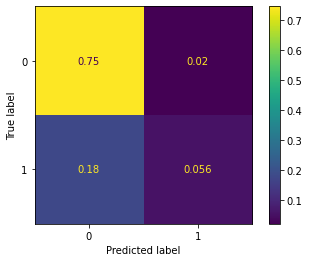

In [ ]:
knn2.fit(x_train,y_train)
print(knn2.score(x_test, y_test))
y_pred_dt = knn2.predict(x_test)
y_prob_dt = knn2.predict_proba(x_test)[:, 1]

from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))
plot_confusion_matrix(knn2, x_test, y_test, normalize='all')

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred_dt)
knn_precision = precision_score(y_test, y_pred_dt)
knn_recall = recall_score(y_test, y_pred_dt)
knn_f1 = f1_score(y_test, y_pred_dt)

print(knn_accuracy)
print(knn_precision)
print(knn_recall)
print(knn_f1)

knn_auc = roc_auc_score(y_test, y_pred_dt)
print(knn_auc)

0.8023612912031666
0.7356115107913669
0.2391812865497076
0.3609885260370697
0.6065042015406776


# 분석
**1.ZeroR (Accuracy=76.07%)**

base가 되는 classifier이다. label이 0인 데이터가 전체 중 약 76%정도 존재하므로, ZeroR은 76%가 된다.




**2.Decision Tree (Accuracy=86.37%, AUC=0.7566)**

정형데이터이고, instance도 feature을 중심으로 분류할 만큼은 확보되었기 때문에, Decision Tree모델은 성능이 좋을 것이라 예측했다. 실험 결과 트리의 max_depth를 제한하고, feature selection을 하지 않는 모델이 가장 성능이 좋았다. accuracy 부분에선 Random Forest와 차이가 거의 없을 정도로 좋았지만, AUC는 Random Forest와 차이가 꽤 났다. Recall이나 f1 score도 Random Forest보다는 낮은 값이다. 이 데이터셋은 0 클래스(수입이 50만 달러보다 작음)가 많은 편향된 데이터이다. 따라서 0으로 많이 분류를 하면 accuracy는 올라가지만, 다른 수치는 작아지게 될 수 있다. AUC를 고려해볼때, Decision Tree를 사용하면, 잘못 0으로 분류하는 경우가 많다는 뜻이 된다. 

**3.MLP (Accuracy=80.61%, AUC=0.5983)**

기대보다 성능이 좋지 않았던 모델이다. feature selection 없이, hidden layer 개수를 조정한 모델이 가장 성능이 좋았다. hidden layer를 조정하면, 너무 많은 hidden layer, node가 있는 것보다 generalization이 잘 되었다. 그러나, Decision Tree에 비해 성능이 좋지 않았다. 그 이유는 instance가 weight를 잘 훈련시킬 만큼 많이 확보가 되지 않은 것으로 유추할 수 있다. 
hidden layer를 줄인 MLP가 성능이 좋았다는 것은 MLP가 학습하기에, feature space가 그 만큼 복잡하지는 않았다는 것으로 해석할 수도 있을 것이다.

**4.Rogistic Regression (Accuracy=80.45%, AUC=0.6176)**

MLP와 비슷한 결과가 나왔다. feature selection을 하고,훈련을 더 많이 반복한 regression이 가장 좋은 성능이 나왔지만, 성능은 MLP와 비슷한, Decision Tree와 Random Forest보다 좋지 않게 나왔다. MLP와 비슷한 성능이 나온 이유는 Logistic Regression도 결국 Linear Regression의 결과값을 sigmoid 취한 것이기 때문으로 유추할 수 있다. Linear Regression도 역전파 방법을 통해 최적의 parameter을 찾는 모델이지만, MLP와 비슷하게, 최적의 parameter를 찾아서 올바르게 분류하기에는 instance들이 많지 않았던 것이다. 혹은 데이터셋 자체가 선형성을 가지지 않았기 때문에, 성능이 낮았을 수도 있을 것이다.

**5.Random Forest (Accuracy=86.54%, AUC=0.7883)**

가장 기대했던 모델이고, 성능도 가장 좋게 나왔다. Feature selection 없이 Decision Tree를 많이 만들고 ensembel할 수록 좋은 성능이 나온것을 알 수 있었다.
Accuracy는 Decision Tree와 비슷했지만, AUC는 0.78로 Decision Tree보다 꽤 높은 값이 나왔다. Decision Tree 여러개를 ensemble하기 때문에 한 가지 트리만 쓰는 Decision Tree보다 더 좋은 성능이 나온 것이라고 추측할 수 있다.

**6.KNN (Accuracy=80.23%, AUC=0.6065)**

Accuracy 관점에선 가장 성능이 좋지 않았다. 데이터셋이 복잡하고 feature이 많아서, feature간의 거리를 계산한는 것 만으로는, 좋은 분류가 되지 않음을 알 수 있다.즉, 차원의 저주 현상이 나타난 것으로 해석할 수 있을 것이다. 즉, feature이 많아질 수록, 이웃 데이터와의 거리는 멀어져, 그 거리 공간을 메워줄 instance data가 더 많이 필요해지는 것이다. 이번 실험에선 feature의 개수에 비해 KNN 알고리즘 학습에 필요한 데이터가 적은 것이라고 유추해볼 수 있을 것이다.

# 결론
feature selection없이 n_estimators를 높인 Random Forest의 성능이 Accuracy관점이나 AUC관점에서나 가장 좋았다. Accuracy관점에선 Random Forest와 Decision Tree가 비슷하지만, 실험에서 사용한 데이터셋은 편향된 데이터 셋이므로 AUC나 recall같은 지표가 더 중요하다. 이 지표들에 따르면 Random Forest가 Decision Tree보다 확실히 더 나은 성능을 보여준다. 